<div class="">
<br><br>
<center><br><font size="12"><font face="times new roman"><strong>Artificial Neural Network
<center><br><font size="5"><font face="times new roman"><strong>Breast Cancer Wisconsin Dataset by UCI Machine Learning
<br><br>
    
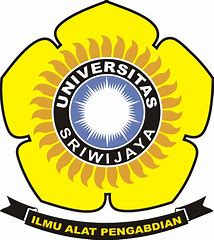
<br><br>
<center><br><strong>TIA HERMITA
    <br>
<br><strong>09011281722051
<br><br>
<br><strong>Mata Kuliah Kecerdasan Buatan (AI)
    <br>
    <br>
<br>
<br><strong>Dosen Pengampuh : 
<br>
    <br><strong>Prof. Dr. Ir. Siti Nurmaini, M.T.
<br><br><br>
    <br>
    <br>
<br><strong>Jurusan Sistem Komputer
<br>
<br><strong>Fakultas Ilmu Komputer
<br>
    <br><strong>Universitas Sriwijaya
<br>
<br><strong>2019

# Import Library

In [2]:
# main library
import pandas as pd # library pengolah data
import matplotlib.pyplot as plt # library pembuat plot
import seaborn as sns # library untuk membuat grafik statisfik
import numpy as np # library komputasi array
np.random.seed(7)
import keras

# sklearn library
from sklearn.model_selection import train_test_split # library pembagi data
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,classification_report,roc_curve
from sklearn.preprocessing import MinMaxScaler # library untuk menskalakan setiap fitur ke rentang tertentu
from sklearn.metrics import confusion_matrix # library hitung matriks untuk mengevaluasi keakuratan klasifikasi
from keras.models import Sequential # library model lapisan bertumpuk
from keras.layers import Dense # library penambahan layer
from keras.utils.np_utils import to_categorical #library untuk mengubah vektor kelas (integer) ke matriks kelas biner
from keras.layers import Dense, Dropout #hanya lapisan Neural Network yang terhubung
from keras.activations import relu
from keras.optimizers import Adam

C:\Users\ASUS\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Load Dataset

Data yang digunakan kali ini ialah dataset Breast Cancer Wisconsin yang diambil dari UCI Machine Learning Repository. 

In [3]:
data = pd.read_csv ("breastCancer.csv")

In [4]:
# menampilkan 5 baris awal
data.head()

,id,clump thickness,size uniformity,shape uniformity,marginal adhesion,epithelial size,bare nucleoli,bland chromatin,normal nucleoli,mitoses,kelas
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
# menghapus kolom id pada data
data = data.drop(columns=['id'])
data.head()

,clump thickness,size uniformity,shape uniformity,marginal adhesion,epithelial size,bare nucleoli,bland chromatin,normal nucleoli,mitoses,kelas
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [6]:
# menampilkan rangkuman statistik data
data.describe()

,clump thickness,size uniformity,shape uniformity,marginal adhesion,epithelial size,bare nucleoli,bland chromatin,normal nucleoli,mitoses,kelas
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.562232,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.648221,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.500000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [7]:
data['kelas'].value_counts()

2    458
4    241
Name: kelas, dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
clump thickness      699 non-null int64
size uniformity      699 non-null int64
shape uniformity     699 non-null int64
marginal adhesion    699 non-null int64
epithelial size      699 non-null int64
bare nucleoli        699 non-null int64
bland chromatin      699 non-null int64
normal nucleoli      699 non-null int64
mitoses              699 non-null int64
kelas                699 non-null int64
dtypes: int64(10)
memory usage: 54.7 KB



# ATTRIBUTE

Adapun atribut yang ada dalam dataset Breast Cancer Wisconsin ialah sbb:

| No |               Attribute          |     Domain    |
|----|----------------------------------|---------------|
| 1  |            clump thickness       |      1-10     |
| 2  |            size uniformity       |      1-10     |
| 3  |            shape uniformity      |      1-10     |
| 4  |           marginal adhesion      |      1-10     |
| 5  |            epithelial size       |      1-10     |
| 6  |            bland chromatin       |      1-10     |
| 7  |            normal nucleoli       |      1-10     |
| 8  |                 mitoses          |      1-10     |
| 9  |                  kelas           |   2 (benign)  |
|    |                                  | 4 (malignant) |

In [9]:
benign = data[data.kelas==2]

In [10]:
malignt = data[data.kelas==4]

# HISTOGRAM

        Histogram ialah plot yang memungkinkan dapat menemukan dan menunjukkan distribusi frekuensi (bentuk) yang mendasari serangkaian data.
        Hist() berfungsi untuk menemukan dan menunjukkan distribusi frekuensi berdasarkan serangkaian data, dan plt.show() berfungsi untuk menampilkannya dalam bentuk grafik.

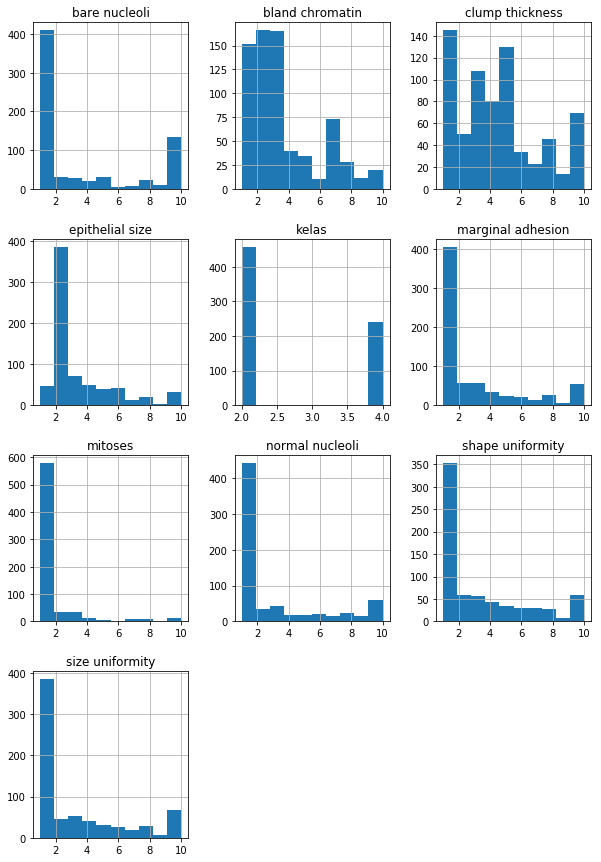

In [11]:
data.hist(figsize=(10,15)) #menemukan dan menunjukkan distribusi frekuensi berdasarkan serangkaian data
plt.show() #menampilkan hasil dari histogram kedalam bentuk grafik

# BOX PLOT

Boxplot merupakan bentuk distribusi data atau skewness, ukuran tendensi sentral serta ukuran penyebaran keragaman data pengamatan yang tersaji dalam bentuk grafis yang merupakan ringkasan distribusi sampel.

clump thickness         AxesSubplot(0.125,0.821923;0.352273x0.0580769)
size uniformity      AxesSubplot(0.547727,0.821923;0.352273x0.0580769)
shape uniformity        AxesSubplot(0.125,0.752231;0.352273x0.0580769)
marginal adhesion    AxesSubplot(0.547727,0.752231;0.352273x0.0580769)
epithelial size         AxesSubplot(0.125,0.682538;0.352273x0.0580769)
bare nucleoli        AxesSubplot(0.547727,0.682538;0.352273x0.0580769)
bland chromatin         AxesSubplot(0.125,0.612846;0.352273x0.0580769)
normal nucleoli      AxesSubplot(0.547727,0.612846;0.352273x0.0580769)
mitoses                 AxesSubplot(0.125,0.543154;0.352273x0.0580769)
kelas                AxesSubplot(0.547727,0.543154;0.352273x0.0580769)
dtype: object

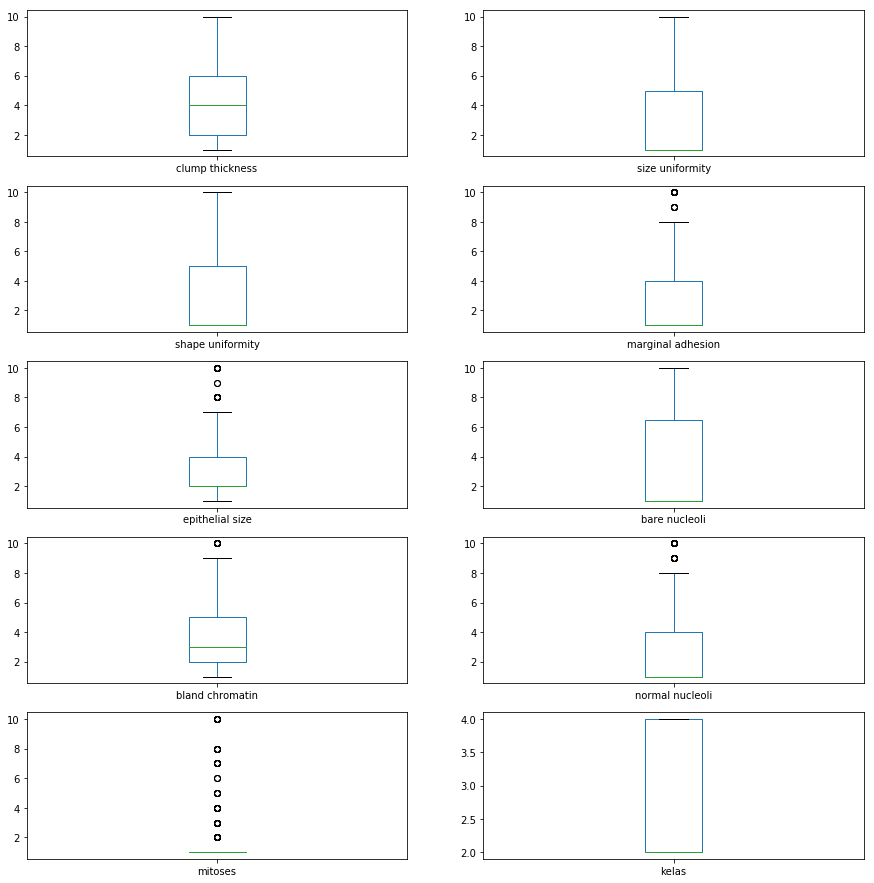

In [12]:
data.plot(kind='box', subplots=True, layout=(11,2), sharex=False, sharey=False, figsize=(15,35))

# FEATURE NORMALIZATION

    	Normalisasi ialah sebuah konsep penting lainnya yang diperlukan untuk mengubah semua fitur ke skala yang sama. Hal ini memungkinkan konvergensi yang lebih cepat pada pembelajaran serta pengaruh yang lebih seragam untuk semua bobot.
        Disini menggunakan MinMaxScaler yang mana akan mengubah fitur dengan penskalaan setiap fitur ke rentang yang diberikan yaitu menjadi 0 dan 1.

In [13]:
# nilai variabel p diambil dari kolom 0 - 9 (feature)
p = data.iloc[:, 0:9].values

# nilai variabel q diambil dari kolom 9 (target)
q = data.iloc[:, 9].values

In [14]:
data2 = pd.DataFrame(p)
data2

,0,1,2,3,4,5,6,7,8
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
5,8,10,10,8,7,10,9,7,1
6,1,1,1,1,2,10,3,1,1
7,2,1,2,1,2,1,3,1,1
8,2,1,1,1,2,1,1,1,5
9,4,2,1,1,2,1,2,1,1


# Scaling

In [15]:
# melakukan scaling dataset dengan penskalaan pada semua fitur dalam rentang yang dimasukkan (0 dan 1)
from keras.utils.np_utils import to_categorical
scaler= MinMaxScaler()
p_scaled = scaler.fit_transform(p)


# membuat variabel data_dataframe untuk menampilkan
data_dataframe = pd.DataFrame(p_scaled)
data_dataframe.head()

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


,0,1,2,3,4,5,6,7,8
0,0.444444,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.0
1,0.444444,0.333333,0.333333,0.444444,0.666667,1.000000,0.222222,0.111111,0.0
2,0.222222,0.000000,0.000000,0.000000,0.111111,0.111111,0.222222,0.000000,0.0
3,0.555556,0.777778,0.777778,0.000000,0.222222,0.333333,0.222222,0.666667,0.0
4,0.333333,0.000000,0.000000,0.222222,0.111111,0.000000,0.222222,0.000000,0.0


In [16]:
p_scaled.shape

(699, 9)

In [17]:
from keras.utils.np_utils import to_categorical
q_categorical = to_categorical(q)
q_categorical.shape

(699, 5)

# Splitting

membagi dataset menjadi trainning data 60% dan testing data 25%, dan sisanya akan digunakan untuk validasi, dimana data dipilih secara random.

In [18]:
p_train, p_test, q_train, q_test = train_test_split(p_scaled, q_categorical, train_size= 0.8, test_size=0.2, random_state=4)

In [19]:
q_real=q_test

In [20]:
# mencetak ukuran data tarining dan testing
print('Train data shape : ', p_train.shape, q_train.shape)
print('Test data shape : ', p_test.shape, q_test.shape)

Train data shape :  (559, 9) (559, 5)
Test data shape :  (140, 9) (140, 5)


In [21]:
# mencetak class output yang dihasilkan (0 atau 1)
classes = np.unique(q_train)
nClasses = len(classes)
print('Total number of outputs : ', classes)
print('Output Classes : ', nClasses)

Total number of outputs :  [0. 1.]
Output Classes :  2


# SEQUENTIAL MODEL

Model Sequential merupakan tumpukan lapisan linear. Dalam menentukan bentuk masukan, model perlu mengetahui bentuk masukan apa yang diinginkan.
Lapisan pertama dalam model sequential mencakup informasi inputannya.
Lapisan selanjutnya dalam model sequential dapat melakukan inferensi bentuk otomatis, dan untuk Lapisan terakhir dalam model sequential mencakup informasi output dan fungsi aktivasinya.
Dalam hal ini, terdapat input layer, hidden layer, dan juga output layer. Dimana ada yang menggunakan Rectified Linear Unit atau Relu, yang berarti cara paling umum dan dasar untuk memperkenalkan non-linearitas ke dalam jaringan saraf.
Fungsinya hanya max (0, x), dan Sigmoid yang merupakan fungsi aktivasi berkelanjutan dan smooth yang paling umum.

In [22]:
model = Sequential() #mendefinisikan model sequential yang ditampung kedalam variabel model
model.add(Dense(20, input_dim=9, activation='relu', use_bias=0.2)) #input layer, dimana relu (Rectified Linear Unit) memperkenalkan non-linearitas kedalam jaringan saraf
model.add(Dense(45, activation=relu, use_bias=0.2))
model.add(Dense(5, activation='sigmoid')) #output layer, merupakan fungsi aktivasi berkelanjutan dan smooth yang paling umum

In [23]:
model.summary() #berfungi untuk menampilkan ringkasan parameter berdasarkan layer dan output shape.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                200       
_________________________________________________________________
dense_2 (Dense)              (None, 45)                945       
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 230       
Total params: 1,375
Trainable params: 1,375
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Model Compile yaitu mengembalikan objek kode Python dari sumber
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [25]:
q_test.shape

(140, 5)

In [26]:
history = model.fit(p_train,q_train, validation_data=(p_test, q_test), epochs=100, batch_size=4)

Train on 559 samples, validate on 140 samples
Epoch 1/100
559/559 [==============================] - 2s 4ms/step - loss: 0.4461 - acc: 0.8304 - val_loss: 0.2353 - val_acc: 0.9643
Epoch 2/100
559/559 [==============================] - 0s 872us/step - loss: 0.1332 - acc: 0.9764 - val_loss: 0.0656 - val_acc: 0.9871
Epoch 3/100
559/559 [==============================] - 1s 899us/step - loss: 0.0604 - acc: 0.9839 - val_loss: 0.0395 - val_acc: 0.9886
Epoch 4/100
559/559 [==============================] - 0s 706us/step - loss: 0.0498 - acc: 0.9853 - val_loss: 0.0387 - val_acc: 0.9857
Epoch 5/100
559/559 [==============================] - 0s 657us/step - loss: 0.0460 - acc: 0.9846 - val_loss: 0.0285 - val_acc: 0.9886
Epoch 6/100
559/559 [==============================] - 0s 612us/step - loss: 0.0439 - acc: 0.9832 - val_loss: 0.0272 - val_acc: 0.9886
Epoch 7/100
559/559 [==============================] - 0s 661us/step - loss: 0.0436 - acc: 0.9853 - val_loss: 0.0284 - val_acc: 0.9886
Epoch 8/100

# Accuracy dan Loss beserta Model  Plotnya

In [27]:
scores = model.evaluate(p_test, q_test)
print("Accuracy data Test = %.2f%%" % (scores[1]*100))
print("Loss data Test = %.2f%%" % (scores[0]))

140/140 [==============================] - 0s 78us/step
Accuracy data Test = 99.29%
Loss data Test = 0.02%


- Plot Accuracy

C:\Users\ASUS\Anaconda3\lib\site-packages\matplotlib\legend.py:641: UserWarning: Unrecognized location "lowwer right". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


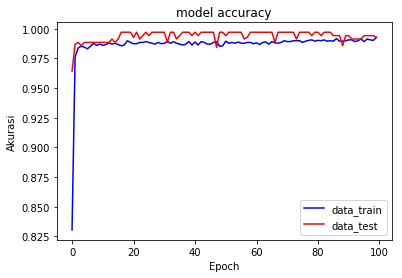

In [28]:
plt.plot(history.history['acc'], color='blue')
plt.plot(history.history['val_acc'], color='red')
plt.title('model accuracy')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend(['data_train', 'data_test'], loc='lowwer right')
plt.show()

- Plot Loss

Menampilkan perbandingan hasil learning data test dan data train dalam bentuk model plot.

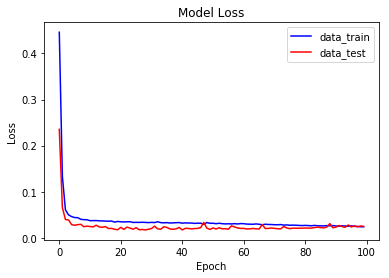

In [29]:
plt.plot(history.history['loss'], color='blue')
plt.plot(history.history['val_loss'], color='red')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['data_train', 'data_test'], loc='upper right')
plt.show()

# Accuracy

In [30]:
predict = model.predict(p_scaled)
predict

array([[0.00000000e+00, 0.00000000e+00, 9.99995708e-01, 0.00000000e+00,
        4.32133675e-06],
       [4.47034836e-07, 4.17232513e-07, 3.76709908e-01, 3.87430191e-07,
        6.06240034e-01],
       [0.00000000e+00, 0.00000000e+00, 9.99988914e-01, 0.00000000e+00,
        1.06394291e-05],
       ...,
       [8.94069672e-08, 2.98023224e-08, 2.53087580e-02, 0.00000000e+00,
        9.73151565e-01],
       [5.96046448e-08, 5.96046448e-08, 1.41758025e-02, 6.77636223e-08,
        9.84804392e-01],
       [2.55660559e-08, 2.44263099e-08, 7.38502201e-03, 2.32817552e-08,
        9.91795361e-01]], dtype=float32)

In [31]:
scores = model.evaluate(p_scaled, q_categorical)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

699/699 [==============================] - 0s 24us/step

acc: 99.17%


In [32]:
print(scores[1])

0.9917023777961731


## CONFUSION MATRIX
Confusion matrix merupakan salah satu metode yang dapat digunakan untuk mengukur kinerja suatu metode klasifikasi. Pada dasarnya confusion matrix mengandung informasi yang bertujuan untuk membandingkan hasil klasifikasi yang dilakukan oleh sistem dengan hasil klasifikasi yang sebenarnya.

In [33]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(q_categorical.argmax(axis=1), predict.argmax(axis=1))

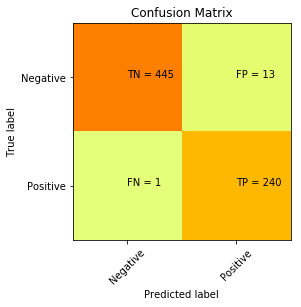

In [34]:
# agar lebih mudah membaca confusion matrix bisa kita tampilkan dalam bentuk plot,
# dimana, TN : True Negatif, FP: False positif, FN : False negatif, TP : True positif
plt.clf()
plt.imshow(CM, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(CM[i][j]))
plt.show()

In [35]:
CM

array([[445,  13],
       [  1, 240]], dtype=int64)

# Accuracy

Accuracy ialah perbandingan antara data yang terklasifikasi benar dengan keseluruhan data. Nilai akurasi dapat diperoleh dengan persamaan sbb:

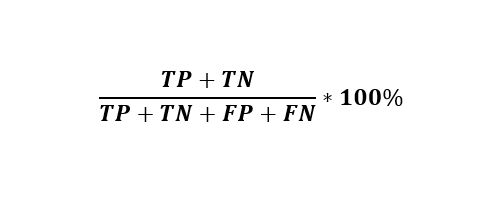

In [39]:
acc = ((240+445) / (240+445+13+1))
print("\n%s: %.2f%%" % ("Accuracy", acc*100))


Accuracy: 98.00%


# Precission

Nilai presisi menggambarkan jumlah data kategori positif yang diklasifikasikan secara benar dibagi dengan total data yang diklasifikasi positif. Nilai presisi dapat diperoleh dengan persamaan sbb:

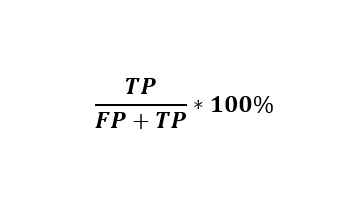

In [40]:
Precission = ((240) / (13+240))
print("\n%s: %.2f%%" % ("Precission", Precission*100))


Precission: 94.86%


# Recall

Recall menunjukkan berapa persen data ketgori positif yang terklasifikasikan dengan benar oleh sistem. Nilai recall dapat diperoleh dengan persamaan sbb:

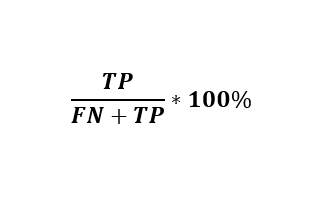

In [41]:
recall = ((240) / (1+240))
print("\n%s: %.2f%%" % ("Recall", recall*100))


Recall: 99.59%
